<IPython.core.display.Javascript object>


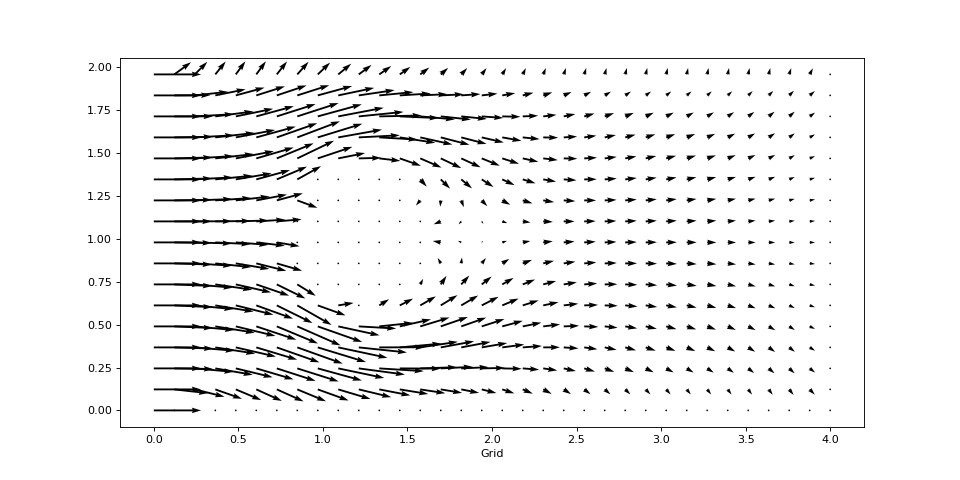

<IPython.core.display.Javascript object>


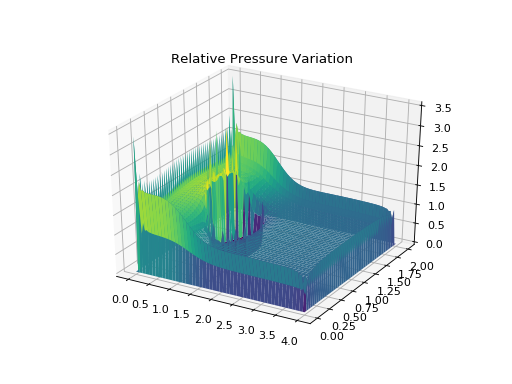

"\n  \n%matplotlib notebook\nfig = plt.figure()\nX, Y = np.meshgrid(a.gridx,a.gridy)\n    \ndef animate(frames):\n    channel_flow()\n    fig.clear()\n    pt1 = plt.quiver(X[::4, ::4], Y[::4, ::4], a.u[::4, ::4], a.v[::4, ::4])\n    #if np.count_nonzero(a.p) > 0:\n        #plt.contourf(X, Y, a.p, alpha=0.5, cmap='viridis')  \n        #c1 = plt.colorbar()\n     #   plt.xlabel('Grid')\n        #c1.set_label('Relative Pressure')\n        #pt2 = plt.contour(X, Y, a.p, cmap='viridis')\n    #else:\n    return pt1\n    #return pt2\n    \n\nanim = animation.FuncAnimation(fig,animate,10000,interval=10,repeat=False,blit=False)\nanim.save('channel_flow_vonkarmen.mp4')\n"

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation    


class fluid_model(object):
    def __init__(self, ax=0, bx=4,ay=0,by=2, Nx=100, Ny=50, t_max=10.0, vel=1.0, rho=1.0, nu=0.05): 
        self.vel = vel
        self.rho = rho
        self.nu = nu
        #self.Force = Force
        
        self.Nx = Nx              # make changes here if square grid is not the case
        self.Ny = Ny
        
        self.delta_x = abs(bx-ax)/self.Nx          ### for functionality only  otherwise both will be same
        self.delta_y = abs(by-ay)/self.Ny
        
        self.gridx = np.linspace(ax,bx,self.Nx)      ### can be ax,bx and ay,by
        self.gridy = np.linspace(ay,by,self.Ny)
        
        self.u = np.zeros((self.Ny,self.Nx))     ## 2D (N*N) grid
        self.v = np.zeros((self.Ny,self.Nx))
        
        self.p = np.zeros((self.Ny,self.Nx))
        self.half = np.zeros((self.Ny,self.Nx))
    
        
#'''
def circle(x0,y0,r0):
    x_0 = x0
    y_0 = y0
    def func(i,j,r):
        if ((i-0.5-x_0)**2 + (j+1-y_0)**2 - r**2 <= 0):
            return int(i), int(j+1)
        else: 
            return int(i-1), int(j+1)
    ans = []
    def circle(r0):
        i, j = int(x_0+r0), int(y_0)
        ans.append([int(i),int(j)])
        while(j-i+x_0-y_0<=0):
            i, j = func(i,j,r0)
            ans.append([int(i),int(j)])
    circle(r0)
    xc=[]
    yc=[]
    ans2 = ans.copy() 

    for k in ans2:
        ans.append([int(k[1]+x_0-y_0), int(k[0]+y_0-x_0)])

    ans2 = ans.copy()
    for k in ans2:
        ans.append([k[0], int(2*y_0-k[1])])

    ans2 = ans.copy()
    for k in ans2:
        ans.append([int(2*x_0-k[0]), k[1]])
    return ans,x0,y0,r0
#'''
'''
def circle(x,y,r,n,option):
    x_0 = x
    y_0 = y
    r = r
    n = n
    ans = []
    for i in range (n):
        if(option=='+'):
            x,y = np.ceil(x_0 + r * np.cos(360/n*i)), np.ceil(y_0 + r * np.sin(360/n*i))
        elif(option=='-'):
            x,y = np.floor(x_0 + r * np.cos(360/n*i)), np.floor(y_0 + r * np.sin(360/n*i))
        ans.append([x,y])
    x = []
    y = []
    for i in ans:
        x.append(i[0])
        y.append(i[1]) 
    return [x,y],
'''        
#############################################################################################################
        
a = fluid_model()
set1,x0,y0,r0 = circle(25,30,10)
#set2 = circle(30,100,11)
def update_p():
    dt = 0.001       #### might need to change as per grid and velocity parameters
    dx = a.delta_x
    dy = a.delta_y
    un = a.u.copy()
    vn = a.v.copy()
    p_n = a.p.copy()
    rho = a.rho
    #n = a.N
    
    #### half the equation ####
    k = a.half.copy()
    k[1:-1,1:-1] = (1/dt) * ( (un[1:-1,2:] - un[1:-1,:-2])/(2*dx) + (vn[2:,1:-1] - vn[:-2,1:-1])/(2*dy)) \
                    - ((un[1:-1,2:] - un[1:-1,:-2])/(2*dx))**2 - ((vn[2:,1:-1] - vn[:-2,1:-1])/(2*dy))**2 \
                    - 2 * ((un[2:,1:-1] - un[:-2,1:-1])/(2*dy)) * ((vn[1:-1,2:] - vn[1:-1,:-2])/(2*dx))
    ########################################################################################################
    ####### BC at x=2  ###############################################################################
    '''
    k[1:-1,-1] = (1/dt) * ( (un[1:-1,0] - un[1:-1,-2])/(2*dx) + (vn[2:,-1] - vn[:-2,-1])/(2*dy)) \
                    - ((un[1:-1,0] - un[1:-1,-2])/(2*dx))**2 - ((vn[2:,-1] - vn[:-2,-1])/(2*dy))**2 \
                    - 2 * ((un[2:,-1] - un[:-2,-1])/(2*dy)) * ((vn[1:-1,0] - vn[1:-1,-2])/(2*dx))
    
    ####### BC at x=0  ################################################################################
    
    k[1:-1,0] = (1/dt) * ( (un[1:-1,1] - un[1:-1,-1])/(2*dx) + (vn[2:,0] - vn[:-2,0])/(2*dy)) \
                    - ((un[1:-1,1] - un[1:-1,-1])/(2*dx))**2 - ((vn[2:,0] - vn[:-2,0])/(2*dy))**2 \
                    - 2 * ((un[2:,0] - un[:-2,0])/(2*dy)) * ((vn[1:-1,1] - vn[1:-1,-1])/(2*dx))
    '''
    ########################################################################################################
    
    
    diff = 1
    step = 0
    while(step<100):        #### iterations for pressure to settle
        p_n = a.p.copy()
        a.p[1:-1,1:-1] = ( (p_n[1:-1,2:] + p_n[1:-1,:-2]) * dy**2 + (p_n[2:,1:-1] + p_n[:-2,1:-1]) * dx**2 \
                          - (rho * dx**2 * dy**2 * k[1:-1,1:-1]) ) / (2 * (dx**2+dy**2))
    ########################################################################################################
    ########## Bc ######### 
        '''
        a.p[1:-1,-1] = ( (p_n[1:-1,0] + p_n[1:-1,-2]) * dy**2 + (p_n[2:,-1] + p_n[:-2,-1]) * dx**2 \
                          - (rho * dx**2 * dy**2 * k[1:-1,-1]) ) / (2 * (dx**2+dy**2))
        
        a.p[1:-1,0] = ( (p_n[1:-1,1] + p_n[1:-1,-1]) * dy**2 + (p_n[2:,0] + p_n[:-2,0]) * dx**2 \
                          - (rho * dx**2 * dy**2 * k[1:-1,0]) ) / (2 * (dx**2+dy**2))
        '''    
    ########################################################################################################
            
        #a.p[0,:] = a.p[1,:]             ### dp/dy=0 at y=0
        #a.p[-1,:] = a.p[-2,:]           ### dp/dy=0 at y=2
        a.p[:,-1] = 0
        for i in set1:
            if(i[0]>=x0 and i[1]>=y0):
                a.p[i[0]][i[1]] = a.p[i[0]+1][i[1]]             
                a.p[i[0]][i[1]] = a.p[i[0]][i[1]+1]
            if(i[0]>=x0 and i[1]<=y0):
                a.p[i[0]][i[1]] = a.p[i[0]+1][i[1]]             
                a.p[i[0]][i[1]] = a.p[i[0]][i[1]-1]
            if(i[0]<=x0 and i[1]>=y0):
                a.p[i[0]][i[1]] = a.p[i[0]-1][i[1]]             
                a.p[i[0]][i[1]] = a.p[i[0]][i[1]+1]
            if(i[0]<=x0 and i[1]<=y0):
                a.p[i[0]][i[1]] = a.p[i[0]-1][i[1]]             
                a.p[i[0]][i[1]] = a.p[i[0]][i[1]-1]
            
        step += 1

def update_u():
    dt = 0.001      #### might need to change as per grid and velocity parameters
    dx = a.delta_x
    dy = a.delta_y
    vn = a.v.copy()
    un = a.u.copy()
    p = a.p.copy()
    rho = a.rho
    nu = a.nu
    
    a.u[1:-1, 1:-1] = un[1:-1,1:-1]- un[1:-1,1:-1] * dt / dx * (un[1:-1,1:-1] - un[1:-1,:-2]) \
                      - vn[1:-1,1:-1] * dt / dy * (un[1:-1,1:-1] - un[:-2,1:-1]) \
                      - dt / (2 * rho * dx) * (p[1:-1,2:] - p[1:-1,:-2]) + nu * (dt / dx**2 \
                    * (un[1:-1,2:] - 2 * un[1:-1,1:-1] + un[1:-1,:-2]) + dt / dy**2 \
                    * (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[:-2,1:-1]))
    
    
    #a.u = un

def update_v():
    dt = 0.001    #### might need to change as per grid and velocity parameters
    dx = a.delta_x
    dy = a.delta_y
    vn = a.v.copy()
    un = a.u.copy()
    p = a.p.copy()
    rho = a.rho
    nu = a.nu
    
    a.v[1:-1, 1:-1] = (vn[1:-1,1:-1]- un[1:-1,1:-1] * dt / dx * (vn[1:-1,1:-1] - vn[1:-1,:-2]) \
                      - vn[1:-1,1:-1] * dt / dy * (vn[1:-1,1:-1] - vn[:-2,1:-1]) \
                      - dt / (2 * rho * dy) * (p[2:,1:-1] - p[:-2,1:-1]) + nu * (dt / dx**2 \
                    * (vn[1:-1,2:] - 2 * vn[1:-1,1:-1] + vn[1:-1,:-2]) + dt / dy**2 \
                    * (vn[2:,1:-1] - 2 * vn[1:-1,1:-1] + vn[:-2,1:-1])))
    
    #a.v = vn

def channel_flow():
    update_p()
    for i in range(x0-r0,x0+r0):
        for j in range(y0-r0,y0+r0):
            d = (i-x0)**2 + (j-y0)**2 - r0**2
            if(d<=0):
                a.p[i][j] = 0
            else:
                pass
    
    update_u()
    update_v()
    
    dt = 0.001
    dx = a.delta_x
    dy = a.delta_y
    un = a.u.copy()
    vn = a.v.copy()
    p = a.p.copy()
    rho = a.rho
    nu = a.nu

    ############# enforce BC's ############
    '''
    a.u[1:-1,-1] = un[1:-1,-1]- un[1:-1,-1] * dt / dx * (un[1:-1,-1] - un[1:-1,-2]) \
                      - vn[1:-1,-1] * dt / dy * (un[1:-1,-1] - un[:-2,-1]) \
                      - dt / (2 * rho * dx) * (p[1:-1,0] - p[1:-1,-2]) + nu * (dt / dx**2 \
                    * (un[1:-1,0] - 2 * un[1:-1,-1] + un[1:-1,-2]) + dt / dy**2 \
                    * (un[2:,-1] - 2 * un[1:-1,-1] + un[:-2,-1])) + (F[] * dt)
    
    a.u[1:-1,0] = un[1:-1,0]- un[1:-1,0] * dt / dx * (un[1:-1,0] - un[1:-1,-1]) \
                      - vn[1:-1,0] * dt / dy * (un[1:-1,0] - un[:-2,0]) \
                      - dt / (2 * rho * dx) * (p[1:-1,1] - p[1:-1,-1]) + nu * (dt / dx**2 \
                    * (un[1:-1,1] - 2 * un[1:-1,0] + un[1:-1,-1]) + dt / dy**2 \
                    * (un[2:,0] - 2 * un[1:-1,0] + un[:-2,0])) + (F * dt)
    
    a.v[1:-1,-1] = (vn[1:-1,-1]- un[1:-1,-1] * dt / dx * (vn[1:-1,-1] - vn[1:-1,-2]) \
                      - vn[1:-1,-1] * dt / dy * (vn[1:-1,-1] - vn[:-2,-1]) \
                      - dt / (2 * rho * dy) * (p[2:,-1] - p[:-2,-1]) + nu * (dt / dx**2 \
                    * (vn[1:-1,0] - 2 * vn[1:-1,-1] + vn[1:-1,-2]) + dt / dy**2 \
                    * (vn[2:,-1] - 2 * vn[1:-1,-1] + vn[:-2,-1])))
    
    a.v[1:-1,0] = (vn[1:-1,0]- un[1:-1,0] * dt / dx * (vn[1:-1,0] - vn[1:-1,-1]) \
                      - vn[1:-1,0] * dt / dy * (vn[1:-1,0] - vn[:-2,0]) \
                      - dt / (2 * rho * dy) * (p[2:,0] - p[:-2,0]) + nu * (dt / dx**2 \
                    * (vn[1:-1,1] - 2 * vn[1:-1,0] + vn[1:-1,-1]) + dt / dy**2 \
                    * (vn[2:,0] - 2 * vn[1:-1,0] + vn[:-2,0])))
    '''
    
    a.u[:,0] = 1
    #a.u[-1,:] = 0
    a.v[0,:] = 0
    a.v[-1,:] = 0
    
    for i in range(x0-r0,x0+r0):
        for j in range(y0-r0,y0+r0):
            d = (i-x0)**2 + (j-y0)**2 - r0**2
            if(d<=0):
                a.u[i][j] = 0
                a.v[i][j] = 0
            else:
                pass
    
    for i in set1:
        if(i[0]>=x0 and i[1]>=y0):
            a.p[i[0]][i[1]] = 0          
            a.p[i[0]][i[1]] = 0
        if(i[0]>=x0 and i[1]<=y0):
            a.p[i[0]][i[1]] = 0             
            a.p[i[0]][i[1]] = 0
        if(i[0]<=x0 and i[1]>=y0):
            a.p[i[0]][i[1]] = 0             
            a.p[i[0]][i[1]] = 0
        if(i[0]<=x0 and i[1]<=y0):
            a.p[i[0]][i[1]] = 0             
            a.p[i[0]][i[1]] = 0

    #for i in range(a.Ny):
     #   a.u[i,0] = a.u[i,0] * (1 + 1e-2*np.sin(i*2*np.pi/a.Ny)) 
                
                
#'''               
def simple_plot():
    for i in range(2000):     ##### range*dt = time elapsed
        channel_flow()
    fig = plt.figure(figsize=(12,6))
    X, Y = np.meshgrid(a.gridx,a.gridy)
    #plt.contourf(X, Y, a.p, alpha=0.5, cmap='viridis')  
    #c1 = plt.colorbar()
    #plt.contour(X, Y, a.p, cmap='viridis')
    #plotting velocity field
    plt.quiver(X[::3, ::3], Y[::3, ::3], a.u[::3, ::3], a.v[::3, ::3])
    plt.xlabel('Grid')
    #c1.set_label('Relative Pressure')
    plt.show()
    
    fig1 = plt.figure()
    X, Y = np.meshgrid(a.gridx,a.gridy)
    ax1 = fig1.gca(projection='3d')                      
    ax1.plot_surface(X, Y, a.p[:],cmap='viridis')
    plt.title('Relative Pressure Variation')
    
%matplotlib notebook    
simple_plot()
#'''

######### animation #######

'''
  
%matplotlib notebook
fig = plt.figure()
X, Y = np.meshgrid(a.gridx,a.gridy)
    
def animate(frames):
    channel_flow()
    fig.clear()
    pt1 = plt.quiver(X[::4, ::4], Y[::4, ::4], a.u[::4, ::4], a.v[::4, ::4])
    #if np.count_nonzero(a.p) > 0:
        #plt.contourf(X, Y, a.p, alpha=0.5, cmap='viridis')  
        #c1 = plt.colorbar()
     #   plt.xlabel('Grid')
        #c1.set_label('Relative Pressure')
        #pt2 = plt.contour(X, Y, a.p, cmap='viridis')
    #else:
    return pt1
    #return pt2
    

anim = animation.FuncAnimation(fig,animate,10000,interval=10,repeat=False,blit=False)
anim.save('channel_flow_vonkarmen.mp4')
'''